In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import time

In [2]:
def bus_arr(n, lambd, second = False):
    lambd = lambd # as given in study guide, avg rate at which events happen
    a = 0
    b = 10 # passenger arrives before minute 10
    beta = 1/lambd # avg time between events

    # passenger arrives at uniformly random time
    pass_arr = np.random.uniform(a,b)
    bus_count = 0
    
    # check if we're doing first or second scenario
    if second == False:
        cur_time = 0
        for i in range(n):
            # city bus arrival
            bus_arr = np.random.exponential(beta)
            cur_time += bus_arr
            #print('Bus arrival:', cur_time)
            #print('Passenger arrival:', pass_arr)
            bus_count += 1
        
            if pass_arr <= cur_time: 
                wait_time = cur_time-pass_arr
                break
    else:
        cur_time = 0
        for i in range(n):
            # city bus arrival
            bus_arr = np.random.uniform(0,2*lambd)
            cur_time += bus_arr
            bus_count += 1
        
            if pass_arr <= cur_time: 
                wait_time = cur_time-pass_arr
                break
    return wait_time

In [3]:
wait_lst = []
wait_lst2 = []
for i in range(20):
    # for lambda is exponential
    wait_lst.append(bus_arr(100, 1))
    # for 2*lambda where bus arrival is U(0, 2lambda)
    wait_lst2.append(bus_arr(100, 1, True))
    
avg_wait = np.mean(wait_lst)
avg_wait2 = np.mean(wait_lst2)
print('The average waiting time for 1/lambda exponential is:', avg_wait)
print('The average waiting time for 2*lambda uniform is:', avg_wait2)

The average waiting time for 1/lambda exponential is: 1.1997586523345984
The average waiting time for 2*lambda uniform is: 0.5175900624491205


# Q2

In [4]:
data = {
50: 0.00832, 51: 0.00911, 52: 0.00996, 53: 0.01089, 54: 0.01190,
55: 0.01300, 56: 0.01421, 57: 0.01554, 58: 0.01700, 59: 0.01859,
60: 0.02034, 61: 0.02224, 62: 0.02431, 63: 0.02657, 64: 0.02904,
65: 0.03175, 66: 0.03474, 67: 0.03804, 68: 0.04168, 69: 0.04561,
70: 0.04979, 71: 0.05415, 72: 0.05865, 73: 0.06326, 74: 0.06812,
75: 0.07337, 76: 0.07918, 77: 0.08570, 78: 0.09306, 79: 0.10119,
80: 0.10998, 81: 0.11935, 82: 0.12917, 83: 0.13938, 84: 0.15001,
85: 0.16114, 86: 0.17282, 87: 0.18513, 88: 0.19825, 89: 0.21246,
90: 0.22814, 91: 0.24577, 92: 0.26593, 93: 0.28930, 94: 0.31666,
95: 0.35124, 96: 0.40056, 97: 0.48842, 98: 0.66815, 99: 0.72000,
100: 0.76000, 101: 0.80000, 102: 0.85000, 103: 0.90000,
104: 0.96000, 105: 1.00000}

In [5]:
end_balance = []
death_age = []
for i in range(100): #try this 1000 times
    cur_money = 150000 #initial investment
    age = 50

    while age < 150:
        # check if the random draw probability is less than 
        #the probability of dying at that age
        if np.random.uniform() < data[age]:
            end_balance.append(cur_money)
            death_age.append(age)
            print('At', age, 'she has', np.round(cur_money,2))
            break
       
        growth = np.random.normal(0.08, 0.09)
        cur_money += cur_money*growth 
    
        if age <= 70:
            cur_money+=10000 #she contributes 10k
        else:
            cur_money -= 65000 # she withdraws 65k
        age += 1 #she's older by a year

At 61 she has 508613.31
At 73 she has 1583451.96
At 68 she has 1598070.42
At 89 she has 1269516.33
At 87 she has 601814.64
At 57 she has 439836.83
At 65 she has 568388.71
At 66 she has 1032734.32
At 80 she has 2381846.34
At 80 she has 3688606.84
At 75 she has 935489.82
At 76 she has 2617197.23
At 74 she has 791844.14
At 78 she has 4875006.81
At 97 she has 24449432.71
At 73 she has 1140278.41
At 80 she has 1024168.58
At 75 she has 869638.93
At 54 she has 230409.17
At 59 she has 308049.33
At 52 she has 221638.03
At 52 she has 173638.66
At 84 she has 3182791.42
At 88 she has 261206.14
At 82 she has 1500538.05
At 71 she has 1081270.39
At 76 she has 551844.33
At 78 she has 1196085.23
At 73 she has 951836.91
At 85 she has 338905.44
At 70 she has 1791906.91
At 84 she has 6379950.3
At 90 she has 2490963.68
At 61 she has 530369.58
At 89 she has 4978297.33
At 84 she has 3905268.93
At 59 she has 360891.48
At 73 she has 1801262.57
At 84 she has 1088380.52
At 86 she has 614395.34
At 86 she has 4099

Text(0.5, 0, 'End Balance')

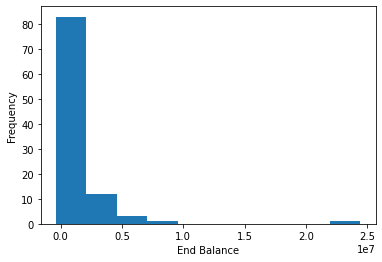

In [6]:
plt.hist(end_balance)
plt.ylabel('Frequency')
plt.xlabel('End Balance')

Text(0.5, 0, 'Age Fanny Mae Dies At')

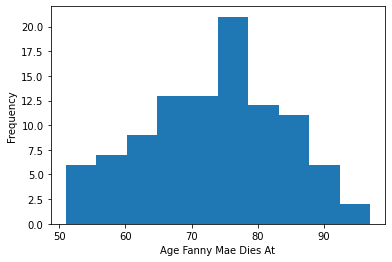

In [7]:
plt.hist(death_age)
plt.ylabel('Frequency')
plt.xlabel('Age Fanny Mae Dies At')